In [230]:
%matplotlib inline
import pandas as pd
import numpy as np

In [231]:
from IPython.core.display import HTML


In [232]:
doc_concepts = pd.DataFrame.from_csv('../../data/cirp_concepts_unwind.csv', index_col=None)
doc_concepts.head()

_id event_short_name  event_year  \
0  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
1  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
2  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
3  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
4  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   

                                         title  \
0  Assessment of products for optimal lifetime   
1  Assessment of products for optimal lifetime   
2  Assessment of products for optimal lifetime   
3  Assessment of products for optimal lifetime   
4  Assessment of products for optimal lifetime   

                                            abstract            concept  \
0  Sustainable manufacturing requires products to...        Engineering   
1  Sustainable manufacturing requires products to...         Technology   
2  Sustainable manufacturing requires products to...  Industrial design   
3  Sustainable manufacturing requires products to...   Katharine McPhee   
4  Sustainable manufacturing requires products to...            Science   

   concept_relevance  
0           0.853031  
1           0.790793  
2           0.747593  
3           0.704206  
4           0.658686

In [233]:
#####NUMBER OF UNIQUE DOCUMENTS
dc = doc_concepts
dc._id.nunique()
print('Number of documents:',dc._id.nunique(), '\nNumber of unique concepts:', dc.concept.nunique() )

Number of documents: 1205 
Number of unique concepts: 2220


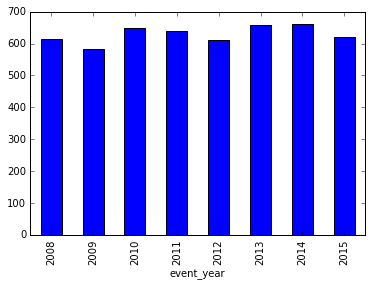

In [234]:
#####NUMBER OF UNIQUE CONCEPTS BY YEAR
dc.groupby(['event_year'])['concept'].nunique().plot(kind='bar')

In [235]:
###
### Plot a chart by relevance
###
#dc.drop(dc.columns[[1,2,3,4]], axis=1, inplace=True)
dc.head()

_id event_short_name  event_year  \
0  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
1  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
2  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
3  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
4  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   

                                         title  \
0  Assessment of products for optimal lifetime   
1  Assessment of products for optimal lifetime   
2  Assessment of products for optimal lifetime   
3  Assessment of products for optimal lifetime   
4  Assessment of products for optimal lifetime   

                                            abstract            concept  \
0  Sustainable manufacturing requires products to...        Engineering   
1  Sustainable manufacturing requires products to...         Technology   
2  Sustainable manufacturing requires products to...  Industrial design   
3  Sustainable manufacturing requires products to...   Katharine McPhee   
4  Sustainable manufacturing requires products to...            Science   

   concept_relevance  
0           0.853031  
1           0.790793  
2           0.747593  
3           0.704206  
4           0.658686

In [236]:
dc['rounded_relevance'] = dc.concept_relevance.round(2)
dc.head()

_id event_short_name  event_year  \
0  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
1  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
2  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
3  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
4  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   

                                         title  \
0  Assessment of products for optimal lifetime   
1  Assessment of products for optimal lifetime   
2  Assessment of products for optimal lifetime   
3  Assessment of products for optimal lifetime   
4  Assessment of products for optimal lifetime   

                                            abstract            concept  \
0  Sustainable manufacturing requires products to...        Engineering   
1  Sustainable manufacturing requires products to...         Technology   
2  Sustainable manufacturing requires products to...  Industrial design   
3  Sustainable manufacturing requires products to...   Katharine McPhee   
4  Sustainable manufacturing requires products to...            Science   

   concept_relevance  rounded_relevance  
0           0.853031               0.85  
1           0.790793               0.79  
2           0.747593               0.75  
3           0.704206               0.70  
4           0.658686               0.66

In [237]:
dcg = dc.groupby(['rounded_relevance']).size()
dcg.head()

rounded_relevance
0.23     2
0.24     5
0.25     1
0.26     8
0.27    10
dtype: int64

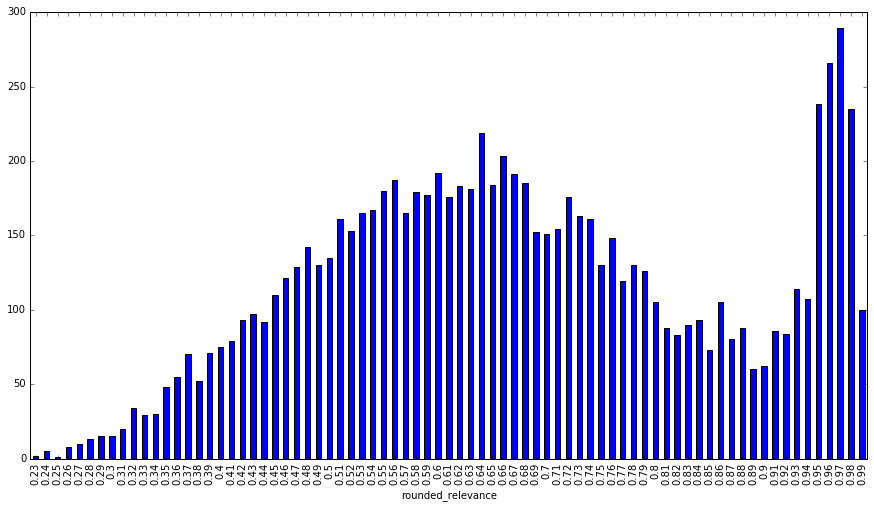

In [238]:
dcg.plot(kind='bar', figsize=(15,8))

In [239]:
dc['concept_relevance'].mean()

0.6770014888146936

In [240]:
dc['concept_relevance'].median()

0.6619470000000001

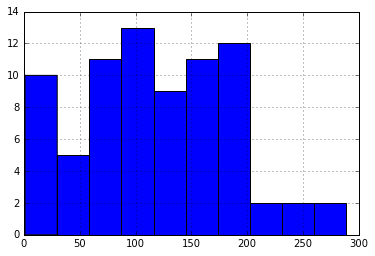

In [241]:
dcg.hist(orientation='vertical', bins=10)

In [242]:
#######
###### TRY WITH RELEVANCE CUTOFF
######

In [243]:
###adding relevance cutoff
dcrel = doc_concepts
dcrel = dcrel[dcrel.concept_relevance > 0.7]
dcrel._id.nunique()

#####NUMBER OF UNIQUE CONCEPTS
##Better overlap?
dcrel.concept.nunique()
print('Number of documents:',dcrel._id.nunique(), '\nNumber of unique concepts:', dcrel.concept.nunique() )

Number of documents: 1205 
Number of unique concepts: 1140


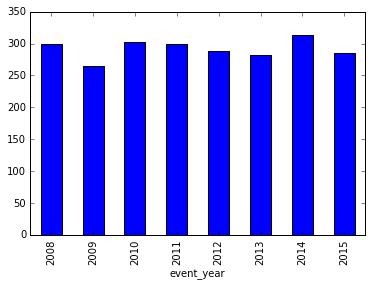

In [244]:
#####NUMBER OF UNIQUE CONCEPTS BY YEAR
dcrel.groupby(['event_year'])['concept'].nunique().plot(kind='bar')

In [245]:
dcrel = dcrel.fillna(0)
dcrel.head()

_id event_short_name  event_year  \
0  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
1  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
2  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
3  CIRP_20080101_2008-57-1-0001-A             CIRP        2008   
6  CIRP_20080101_2008-57-1-0005-A             CIRP        2008   

                                               title  \
0        Assessment of products for optimal lifetime   
1        Assessment of products for optimal lifetime   
2        Assessment of products for optimal lifetime   
3        Assessment of products for optimal lifetime   
6  A comparison of manufacturing and remanufactur...   

                                            abstract  \
0  Sustainable manufacturing requires products to...   
1  Sustainable manufacturing requires products to...   
2  Sustainable manufacturing requires products to...   
3  Sustainable manufacturing requires products to...   
6  Climate change reports and policies relating t...   

                                  concept  concept_relevance  \
0                             Engineering           0.853031   
1                              Technology           0.790793   
2                       Industrial design           0.747593   
3                        Katharine McPhee           0.704206   
6  World energy resources and consumption           0.985249   

   rounded_relevance  
0               0.85  
1               0.79  
2               0.75  
3               0.70  
6               0.99

In [246]:
dcrel.drop(dcrel.columns[[1,2,3,4]], axis=1, inplace=True)

In [247]:
dcrel.head()

_id                                 concept  \
0  CIRP_20080101_2008-57-1-0001-A                             Engineering   
1  CIRP_20080101_2008-57-1-0001-A                              Technology   
2  CIRP_20080101_2008-57-1-0001-A                       Industrial design   
3  CIRP_20080101_2008-57-1-0001-A                        Katharine McPhee   
6  CIRP_20080101_2008-57-1-0005-A  World energy resources and consumption   

   concept_relevance  rounded_relevance  
0           0.853031               0.85  
1           0.790793               0.79  
2           0.747593               0.75  
3           0.704206               0.70  
6           0.985249               0.99

In [248]:
dcrel.dtypes
dcrel.head(600).pivot('_id','concept','concept_relevance')

concept                          3D computer graphics  3D modeling  \
_id                                                                  
CIRP_20080101_2008-57-1-0001-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0005-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0009-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0013-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0017-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0021-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0025-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0029-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0033-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0037-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0041-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0045-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0049-A                    NaN          NaN   
CIRP_20080101_2008-57-1-0053-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0057-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0061-C               0.936872     0.772451   
CIRP_20080101_2008-57-1-0065-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0069-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0073-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0077-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0081-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0085-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0089-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0093-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0097-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0101-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0105-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0109-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0113-C                    NaN          NaN   
CIRP_20080101_2008-57-1-0117-C                    NaN          NaN   
...                                               ...          ...   
CIRP_20090101_2009-58-1-0017-A                    NaN          NaN   
CIRP_20090101_2009-58-1-0021-A                    NaN          NaN   
CIRP_20090101_2009-58-1-0025-A                    NaN          NaN   
CIRP_20090101_2009-58-1-0029-A                    NaN          NaN   
CIRP_20090101_2009-58-1-0033-A                    NaN          NaN   
CIRP_20090101_2009-58-1-0037-A                    NaN          NaN   
CIRP_20090101_2009-58-1-0041-A                    NaN          NaN   
CIRP_20090101_2009-58-1-0045-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0049-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0053-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0057-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0061-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0065-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0069-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0073-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0077-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0081-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0085-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0089-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0093-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0097-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0101-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0105-C                    NaN          NaN   
CIRP_20090101_2009-58-1-0109-C                    NaN          NaN   
CIRP_20090